<a href="https://www.kaggle.com/code/priyanshusethi/regression-model-comparison-pakistan-house-cost?scriptVersionId=130274439" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pakistan-house-price-dataset/zameen-updated.csv


# A Comparitive study for house price prediction using different regression models

### Importing libraries and Reading data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/pakistan-house-price-dataset/zameen-updated.csv")

### Exploratory Data Analysis ( EDA )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [5]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [6]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Flat'),
  Text(1, 0, 'House'),
  Text(2, 0, 'Penthouse'),
  Text(3, 0, 'Farm House'),
  Text(4, 0, 'Lower Portion'),
  Text(5, 0, 'Upper Portion'),
  Text(6, 0, 'Room')])

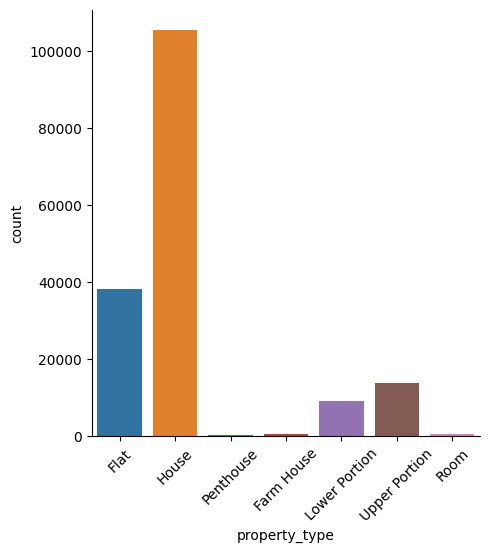

In [7]:
#plotting a graph to understand property types
sns.catplot(x="property_type" , kind='count',data=df)
# tilting x labels for better readability
plt.xticks(rotation=45)

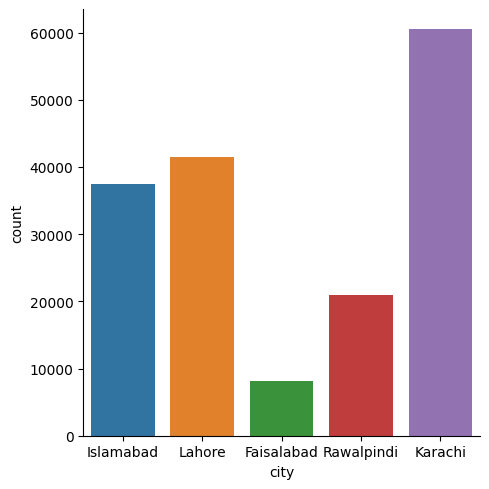

In [8]:
#plotting a graph to understand city wise distribution
sns.catplot(x="city" , kind='count',data=df)

In [9]:
# checking the number of unique locations
pd.Series(df['location'].unique())

0                    G-10
1                    E-11
2                    G-15
3               Bani Gala
4             DHA Defence
              ...        
1504        Sihala Valley
1505    Jamia Masjid Road
1506      Samanzar Colony
1507     Shahra-e-Liaquat
1508               Sundar
Length: 1509, dtype: object

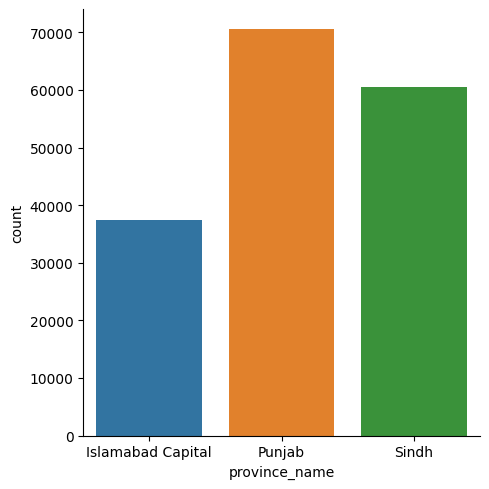

In [10]:
#plotting a graph to understand province wise distribution
sns.catplot(x="province_name" , kind='count',data=df)

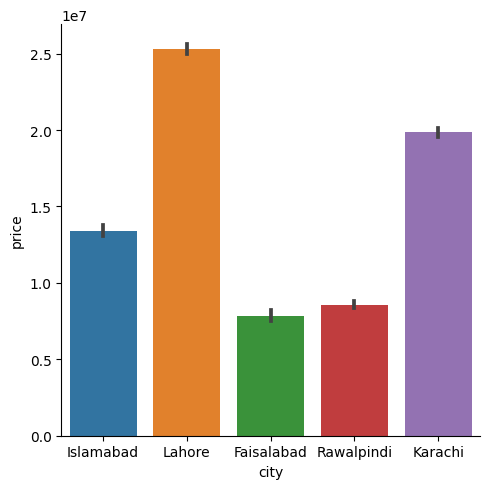

In [11]:
#visualizing city wise prices
sns.catplot(x='city',y='price' , kind = "bar" , data = df)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Flat'),
  Text(1, 0, 'House'),
  Text(2, 0, 'Penthouse'),
  Text(3, 0, 'Farm House'),
  Text(4, 0, 'Lower Portion'),
  Text(5, 0, 'Upper Portion'),
  Text(6, 0, 'Room')])

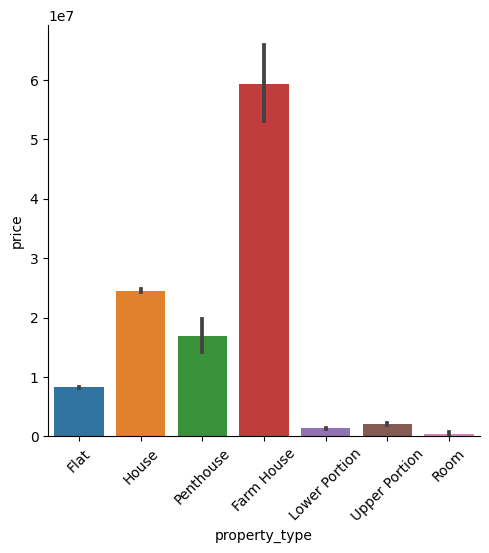

In [12]:
# visualizing prices with respect to property type
sns.catplot(x='property_type',y='price',kind='bar',data=df)
#better readability
plt.xticks(rotation=45)

<AxesSubplot: >

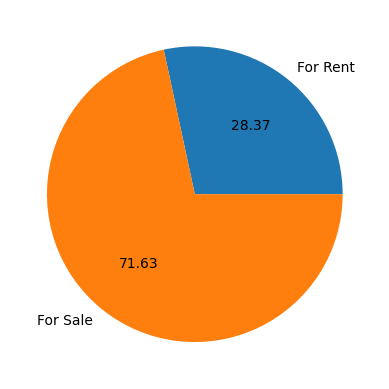

In [13]:
#visualizing purpose of listing
df.groupby('purpose').size().plot(kind='pie', autopct='%.2f')

In [14]:
df.sample(5)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
30458,14037637,198,https://www.zameen.com/Property/karachi_bath_i...,House,64000000,Bath Island,Karachi,Sindh,24.835660,67.028600,4,10 Marla,For Sale,4,06-21-2019,Al Habib Propertiez,AL-Habib Propertiez,Marla,10.0,5-10 Marla
134954,17144261,3390,https://www.zameen.com/Property/ghauri_town_gh...,House,16500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,3,10.5 Marla,For Sale,3,07-10-2019,NaN,NaN,Marla,10.5,10-15 Marla
67386,16110619,4190,https://www.zameen.com/Property/state_life_hou...,House,37500000,State Life Housing Society,Lahore,Punjab,31.446824,74.404736,6,1 Kanal,For Sale,5,06-25-2019,Haram Estate & Builders,Sharafat Malik,Kanal,1.0,1-5 Kanal
72567,16281772,540,https://www.zameen.com/Property/rawalpindi_gul...,Flat,12000,Gulzar-e-Quaid Housing Society,Rawalpindi,Punjab,33.600376,73.130983,0,3 Marla,For Rent,2,05-06-2019,London Real Estate & Builders,Raja Saleem,Marla,3.0,0-5 Marla
54557,15591096,6655,https://www.zameen.com/Property/malir_cantonme...,Flat,24000000,Cantt,Karachi,Sindh,24.937425,67.182856,3,10 Marla,For Sale,3,06-21-2019,The Exponent Real Estate,Nisar Ahmed Maj R A Wahid Ghauri,Marla,10.0,5-10 Marla


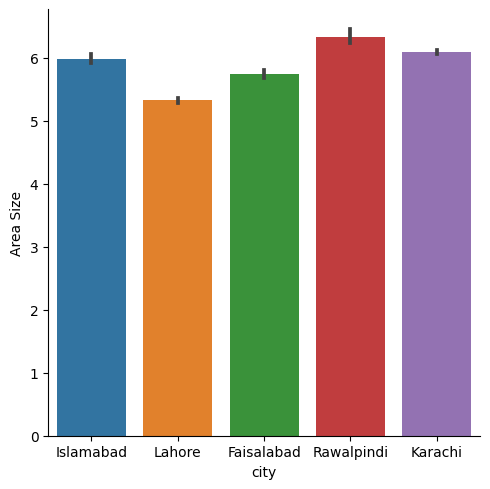

In [15]:
#visualizing house sizes for different cities
sns.catplot(x='city',y='Area Size' , kind = "bar" , data = df)

# Feature Selection and optimization

In [16]:
#removing unusable columns
df = df.drop(["property_id","location_id" , "page_url"],axis="columns")

In [17]:
#removing redundant and non-significant features
df = df.drop(["latitude","longitude" , "baths","area","date_added","agency","agent","Area Category"],axis="columns")

In [18]:
df = df.drop(["bedrooms"],axis="columns")

In [19]:
#causing errors after splitting because of high amount of unique values
df=df.drop(["location"],axis="columns")

In [20]:
df.sample()

,property_type,price,city,province_name,purpose,Area Type,Area Size
107144,House,65000000,Lahore,Punjab,For Sale,Kanal,1.0


In [21]:
#splitting into x and y
df_x =df[['property_type','city',"province_name","purpose","Area Type","Area Size"]]
df_y=df["price"].array.reshape(-1, 1)

In [22]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,
                                                    test_size=0.2,
                                                    random_state=0)

In [23]:
x_train.shape , x_test.shape

((134756, 6), (33690, 6))

In [24]:
#applying standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(y_train)

# transform train and test sets
y_train_scaled = scaler.transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [25]:
x_test

,property_type,city,province_name,purpose,Area Type,Area Size
89777,Flat,Karachi,Sindh,For Sale,Marla,4.0
158067,House,Faisalabad,Punjab,For Sale,Kanal,1.0
14802,Flat,Karachi,Sindh,For Sale,Marla,4.7
167977,Upper Portion,Islamabad,Islamabad Capital,For Rent,Marla,14.2
92118,Penthouse,Karachi,Sindh,For Sale,Marla,4.8
...,...,...,...,...,...,...
92512,House,Lahore,Punjab,For Sale,Kanal,1.0
130728,House,Lahore,Punjab,For Sale,Kanal,1.0
3396,House,Lahore,Punjab,For Sale,Kanal,1.0
114133,House,Islamabad,Islamabad Capital,For Rent,Kanal,1.3


# encoding categorical data

In [26]:
#importing required libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [27]:
#defining the transformer class
transformer = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['For Rent','For Sale']]),['purpose']),
    ('tnf2',OneHotEncoder(sparse=False,drop='first'),['property_type','city',"province_name","Area Type"])
],remainder='passthrough')

In [28]:
#applying the encoding to training data
x_train = transformer.fit_transform(x_train)

#applying the encoding to testing data
x_test = transformer.transform(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
x_test.shape , x_train.shape

((33690, 15), (134756, 15))

# Linear Regression

In [30]:
#importing library
from sklearn.linear_model import LinearRegression

In [31]:
#training the model
lr = LinearRegression()
lr.fit(x_train,y_train_scaled)

LinearRegression()

In [32]:
#predicting price values
y_pred = lr.predict(x_test)

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
mean_absolute_error(y_pred,y_test_scaled)

0.39868030919993164

# Decision Tree Regressor

In [35]:
#importing library
from sklearn import tree

In [36]:
# defining decision tree object
tre = tree.DecisionTreeRegressor()

#training the model
tre.fit(x_train,y_train_scaled)

DecisionTreeRegressor()

In [37]:
#predicting values
y_pred_tree = tre.predict(x_test)

#checking mean absolute error
mean_absolute_error(y_pred_tree,y_test_scaled)

0.15655749520366846

# Random forest regressor

In [38]:
#importing the library
from sklearn.ensemble import RandomForestRegressor

In [39]:
#defining model object
rfe = RandomForestRegressor()

#training the model
rfe.fit(x_train,y_train_scaled)

/tmp/ipykernel_20/3005798627.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfe.fit(x_train,y_train_scaled)


RandomForestRegressor()

In [40]:
#predicting prices
y_pred_rfe = rfe.predict(x_test)

#calculating mean absolute error
mean_absolute_error(y_test_scaled , y_pred_rfe)

0.15509401274653878

# Conclusion

In [41]:
#to be continued
# we have assumed no outliers in this model for now which could be a reason for poor performance by linear regressor